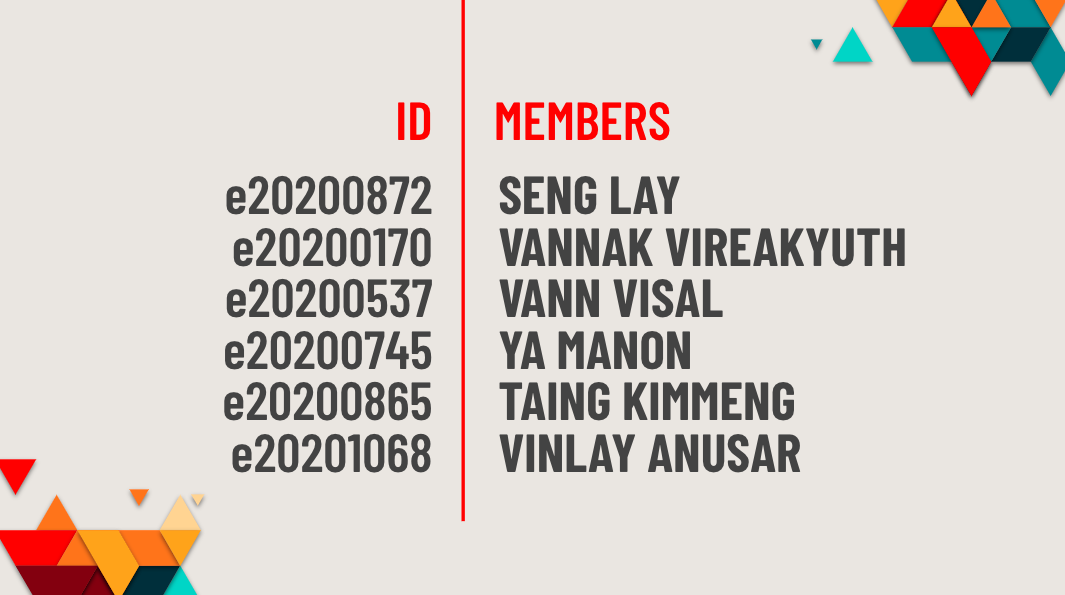

# Import Important Libraries

In [1]:
from bs4 import BeautifulSoup 
from urllib import request
import requests
from urllib.request import Request, urlopen
from urllib.parse import urljoin
import pandas as pd

# Request, open and prettify html structure

In [2]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, Like Gecko) Chrome/104.0.5112.102 Safari/537.36 Edg/104.0.1293.63"}

base_link = 'https://www.simplyhired.com/'

url = f'https://www.simplyhired.com/search?q=information+technology&'
request = Request(url, headers=headers)
webpage = urlopen(request).read()
content = BeautifulSoup(webpage, 'html.parser')
print(content.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <link href="/next-assets/favicon.ico" rel="shortcut icon"/>
  <link as="font" crossorigin="anonymous" href="/next-assets/fonts/FiraSans-Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="/next-assets/fonts/FiraSans-SemiBold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="/next-assets/fonts/FiraSans-Bold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="/next-assets/fonts/FiraSans-Italic.woff2" rel="preload" type="font/woff2"/>
  <meta charset="utf-8"/>
  <meta content="initial-scale=1.0, width=device-width" name="viewport"/>
  <title>
   11 Best information technology jobs (Hiring Now!) | SimplyHired
  </title>
  <link href="https://www.simplyhired.com/search?q=information+technology" rel="canonical"/>
  <meta content="9" name="next-head-count"/>
  <noscript data-n-css="">
  </noscript>
  <script defer="" nomodule=""

# List for storing data

In [3]:
job_Title = []
job_Salary = []
job_Location = []
job_Region = []
job_Rating = []
job_Upload = []

# Pull website URLs from page 1 to 5 (from page 5 up is not yet ready)

In [4]:
base_url = "https://www.simplyhired.com"
search_url = base_url + "/search?q=information+technology&l="
all_urls = []

while search_url:
    # Load the search results page
    response = requests.get(search_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract all the URLs from the page
    for a_tag in soup.find_all(class_='chakra-link css-1wxsdwr'):
        href = a_tag.get('href')
        if href:
            # Make sure the URL is absolute
            href = urljoin(base_url, href)
            all_urls.append(href)

    # Find the "Next" button and extract its URL
    next_button = soup.find('a', class_='next')
    if next_button:
        search_url = base_url + next_button['href']
    else:
        search_url = None
    
    for i in all_urls:
        print(f'{i}')

https://www.simplyhired.com/search?q=information+technology&l=
https://www.simplyhired.com/search?q=information+technology&l=&cursor=AAsAAQALAAAAAAAAAAAAAAAB%2Fd2xvAEABAt9vNklE%2Bn5CTiQ6Hub9yj4%2FEqhv5OkCx1agpU5wA%3D%3D
https://www.simplyhired.com/search?q=information+technology&l=&cursor=AAsAAgAWAAAAAAAAAAAAAAAB%2Fd2xvAEBAQcGUgYvTalfnWDQ0qumGP%2FTXjmY08XTg3yrqBp7RRxL6koY2tKn63IWc62x5xDBuxaGnCZXSQ%3D%3D
https://www.simplyhired.com/search?q=information+technology&l=&cursor=AAsAAwAhAAAAAAAAAAAAAAAB%2Fd2xvAECAQgSBiRC3k7t%2Fwkg%2FxcaLkEHJlekxdA0U9hEMyFRCQ34UycqmpT69EEPBUMooT3s2epOwBZHTPyXYAb%2FPAlifrIg21oaBjTpOdyEKeo%3D
https://www.simplyhired.com/search?q=information+technology&l=&cursor=AAsABAAsAAAAAAAAAAAAAAAB%2Fd2xvAEDAQgSBy4HCC7Uq8XqdMDmSM1fc1gMNGwNOcy1A3JHgCknEw8ORQAELan2maFRDnUdP3ATQQ3TcEfyltoM9DtzKwbTTVMtCFEa4CFOwm9JTJRl2zVEzMjkmUbfOATfYA%3D%3D


# Start Scraping Data

In [5]:
page = int(input('How many page you want to scrape? : '))

page_url = f'https://www.simplyhired.com/search?q=information+technology'
request = Request(page_url, headers=headers)
webpage = urlopen(request).read()
content = BeautifulSoup(webpage, 'html.parser')   

for pages in range(0, page):
    page_url = all_urls[pages]
    request = Request(page_url, headers=headers)
    webpage = urlopen(request).read()
    content = BeautifulSoup(webpage, 'html.parser')
    
    # job title
    job_listings = content.find_all('div', {'class': 'chakra-stack css-84zodg'})
    for job in job_listings:
        try:
            title = job.find('a', class_='chakra-button css-12bkbc3').text
            job_Title.append(title)
        except Exception:
            title = None
    
    # job salary
    job_salary_listing_1 = content.find_all('div', {'class': 'css-1b6seq1'})
    for sal in job_salary_listing_1:
        sal_1 = sal.find(class_='chakra-text css-1ejkpji').text
        if (sal_1):
            job_Salary.append(sal_1)
    job_salary_listing_2 = content.find_all('div', {'class': 'css-2imjyh'})
    for oth_sal in job_salary_listing_2:
        sal_2 = oth_sal.find(class_='chakra-text css-1g1y608')
        if (sal_2):
            job_Salary.append(sal_2.text)
    
    # Location
    job_location = content.find_all(class_='chakra-text css-1sawo7p')
    for loc in job_location:
        try:
            location = loc.find(class_='css-lvyu5j').text
            job_Location.append(location)
        except Exception:
            location = None
    
    # Region
    job_region = content.find_all(class_='chakra-text css-1sawo7p')
    for reg in job_region:
        try:
            region = reg.find(class_='css-1t92pv').text
            job_Region.append(region)
        except Exception:
            region = None
    
    # Job Rating
    job_rating = content.find_all(class_='chakra-text css-1sawo7p')
    for rate in job_rating:
        rating = rate.find(class_='css-epvm6')
        if (rating):
            job_Rating.append(rating.text)
        else:
            rating = None
            job_Rating.append(rating)
            
    # Job Upload Date
    job_upload = content.find_all('div', class_='css-2imjyh')
    for up in job_upload:
        uploadData = up.find(class_='chakra-text css-5yilgw')
        if (uploadData):
            job_Upload.append(uploadData.text)
        else:
            uploadData = None
            job_Upload.append(uploadData)
    
print("\nWe're Ready to go!!!")

How many page you want to scrape? : 5

We're Ready to go!!!


# Show List and length of the list

In [6]:
print(job_Title, "\n")
print(f'Number of elements: {len(job_Title)}')

['Information Technology Specialist', 'Customer Support Engineer', 'Information Technology Technician', 'Cyber Defense Agent', 'Helpdesk Technician', 'Technical Support Engineer (Part-time, Remote from East Coast)', 'Deskside Technician I (Remote)', 'Junior Project Manager', 'Help Desk - Level 1 (Voice/ Chat/ Email) – Remote', 'IT SUPPORT SPECIALIST I', 'Software Support', 'Salesforce Marketing Cloud Developer- Trainee fresher', 'Technology Specialist', 'Security Analyst', 'IT Analyst', 'Helpdesk Technician', 'Entry-Level Tech Support', 'Network Technician', 'Technology Specialist / Computer Hardware/Server/Network Specialist', 'IT Systems & Software Administrator', 'Helpdesk Specialist', 'IT Support - Tier 3', 'IT Service Desk Tech', 'Customer Support Specialist -Night Shift (Thursday to Monday) - Fully Remote', 'IT Help Desk', 'Help Desk Support', 'Product Support - Tier 1', 'Help Desk Analyst (Information Technology Analyst 2 (40 Hour) (Hybrid))', 'IT Support Tech', 'Telecom Enginee

In [7]:
print(job_Salary, '\n')
print(f'Number of elements: {len(job_Salary)}')

['Estimated: $37,331 - $98,500 a year', 'Estimated: From $100,000 a year', 'Estimated: $50,000 - $80,000 a year', 'Estimated: $2,000 - $5,000 a month', 'Estimated: $25 an hour', 'Estimated: $25 - $35 an hour', 'Estimated: $23 - $27 an hour', 'Estimated: $28 an hour', 'Estimated: $36,500 - $54,700 a year', 'Estimated: $4,517 - $6,654 a month', '$28,000 - $35,000 a year', 'Estimated: $58.9K - $74.5K a year', 'Estimated: $35 - $45 an hour', 'Estimated: $32 - $37 an hour', 'Estimated: From $21 an hour', 'Estimated: $35 - $45 an hour', 'Estimated: $25 - $30 an hour', 'Estimated: $55.6K - $70.4K a year', 'Estimated: $40 an hour', 'Estimated: $27 - $30 an hour', 'From $85,280 a year', '$60,000 - $200,000 a year', 'Estimated: $30,000 - $40,000 a year', 'Estimated: $60.1K - $76.1K a year', 'Estimated: $19 - $45 an hour', 'Estimated: $18.00 - $29.22 an hour', 'Estimated: $41.4K - $52.5K a year', 'Estimated: $20 - $35 an hour', 'Estimated: $80,000 - $110,000 a year', 'Estimated: $31.8K - $40.3K a

In [8]:
print(job_Location, '\n')
print(f'Number of elements: {len(job_Location)}')

['U.S. Government\xa0—', 'Files.com\xa0—', 'U.S. Government\xa0—', 'United States Department Of Defense\xa0—', 'Grand Rapids Public Schools\xa0—', 'Ring.io\xa0—', 'Stefanini, Inc\xa0—', 'AOES Consulting LLC\xa0—', 'DXC Technology\xa0—', 'City of Richardson Texas\xa0—', 'Vantagepoint ai, LLC\xa0—', 'kasmo cloud solutions\xa0—', 'Ascension\xa0—', 'SecurityRangers.io\xa0—', 'GMTEA, Inc\xa0—', 'Trinity Solar Careers\xa0—', 'StealthTech\xa0—', 'Pri Global Inc\xa0—', 'Planet Access\xa0—', 'CMX Cinemas\xa0—', 'Interon IT Solutions LLC\xa0—', 'First Call Computer Solutions\xa0—', 'CLX Gaming\xa0—', 'SAP\xa0—', 'Academic Technologies Inc\xa0—', 'Per Scholas\xa0—', 'Oddball\xa0—', 'State of Connecticut - Department of Administrative Services\xa0—', 'CopilotIQ\xa0—', 'Synchrony Systems\xa0—', 'Valor Network Inc\xa0—', 'Trapp Technology Inc\xa0—', 'HubSpot\xa0—', 'synchrony\xa0—', 'Revecore\xa0—', 'Stefanini, Inc\xa0—', 'vMOX\xa0—', 'Specialty Products and Insulation\xa0—', 'EPC Group\xa0—', 'Full

In [9]:
print(job_Region, '\n')
print(f'Number of elements: {len(job_Region)}')

['Carrollton, TX', 'Remote', 'Cypress, CA', 'West Jordan, UT', 'Grand Rapids, MI', 'Remote', 'Remote', 'Remote', 'Texas', 'Richardson, TX', 'Sarasota, FL', 'Remote', 'Remote', 'Remote', 'Remote', 'Wall, NJ', 'Miami, FL', 'Remote', 'Dallas-Fort Worth, TX', 'Remote', 'Remote', 'Remote', 'Emporia, KS', 'Reston, VA', 'Miami, FL', 'Columbus, OH', 'Remote', 'Middletown, CT', 'Remote', 'Remote', 'Seaside Park, NJ', 'Remote', 'Cambridge, MA', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Portland, OR', 'Atlanta, GA', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Doral, FL', 'San Francisco, CA', 'Reston, VA', 'Annapolis, MD', 'Austin, TX', 'Fort Lauderdale, FL'] 

Number of elements: 55


In [10]:
print(job_Rating, '\n')
print(f'Number of elements: {len(job_Rating)}')

['4.3 ', None, '4.3 ', '4.2 ', '3.5 ', None, '3.8 ', '5 ', '3.2 ', '3.9 ', '3.4 ', '5 ', '3.6 ', None, None, '3.9 ', None, None, '3 ', '3.2 ', None, '3.3 ', '4.5 ', '4.2 ', None, '4.2 ', None, '3.9 ', '1 ', None, None, '3.2 ', '4.3 ', '3.8 ', '2.8 ', '3.8 ', '3.3 ', '3.6 ', '5 ', '3 ', '3 ', '3.3 ', None, None, None, '3.2 ', None, '3.4 ', '5 ', '3.7 ', '4.7 ', None, None, '3.6 ', None] 

Number of elements: 55


In [11]:
print(job_Upload, '\n')
print(f'Number of elements: {len(job_Upload)}')

[None, None, None, None, 'Today', 'Today', None, '5d', '4d', None, '5d', None, None, None, '4d', None, None, '7d', None, None, None, None, 'Today', '13d', None, None, 'Today', '7d', None, 'Today', '13d', None, '3d', 'Today', 'Today', '12d', '13d', None, None, None, None, None, '6d', None, '4d', None, None, None, None, 'Today', None, None, '3d', 'Today', '2d'] 

Number of elements: 55


# Make elements look more easy by iteration inside job_Title list!

In [12]:
# Title
for no, value in enumerate(job_Title, start=1):
    print(f'Job {no}:  {value}')

Job 1:  Information Technology Specialist
Job 2:  Customer Support Engineer
Job 3:  Information Technology Technician
Job 4:  Cyber Defense Agent
Job 5:  Helpdesk Technician
Job 6:  Technical Support Engineer (Part-time, Remote from East Coast)
Job 7:  Deskside Technician I (Remote)
Job 8:  Junior Project Manager
Job 9:  Help Desk - Level 1 (Voice/ Chat/ Email) – Remote
Job 10:  IT SUPPORT SPECIALIST I
Job 11:  Software Support
Job 12:  Salesforce Marketing Cloud Developer- Trainee fresher
Job 13:  Technology Specialist
Job 14:  Security Analyst
Job 15:  IT Analyst
Job 16:  Helpdesk Technician
Job 17:  Entry-Level Tech Support
Job 18:  Network Technician
Job 19:  Technology Specialist / Computer Hardware/Server/Network Specialist
Job 20:  IT Systems & Software Administrator
Job 21:  Helpdesk Specialist
Job 22:  IT Support - Tier 3
Job 23:  IT Service Desk Tech
Job 24:  Customer Support Specialist -Night Shift (Thursday to Monday) - Fully Remote
Job 25:  IT Help Desk
Job 26:  Help Desk 

In [13]:
# Salary
for no, value in enumerate(job_Salary, start=1):
    print(f'Salary {no}:  {value}')

Salary 1:  Estimated: $37,331 - $98,500 a year
Salary 2:  Estimated: From $100,000 a year
Salary 3:  Estimated: $50,000 - $80,000 a year
Salary 4:  Estimated: $2,000 - $5,000 a month
Salary 5:  Estimated: $25 an hour
Salary 6:  Estimated: $25 - $35 an hour
Salary 7:  Estimated: $23 - $27 an hour
Salary 8:  Estimated: $28 an hour
Salary 9:  Estimated: $36,500 - $54,700 a year
Salary 10:  Estimated: $4,517 - $6,654 a month
Salary 11:  $28,000 - $35,000 a year
Salary 12:  Estimated: $58.9K - $74.5K a year
Salary 13:  Estimated: $35 - $45 an hour
Salary 14:  Estimated: $32 - $37 an hour
Salary 15:  Estimated: From $21 an hour
Salary 16:  Estimated: $35 - $45 an hour
Salary 17:  Estimated: $25 - $30 an hour
Salary 18:  Estimated: $55.6K - $70.4K a year
Salary 19:  Estimated: $40 an hour
Salary 20:  Estimated: $27 - $30 an hour
Salary 21:  From $85,280 a year
Salary 22:  $60,000 - $200,000 a year
Salary 23:  Estimated: $30,000 - $40,000 a year
Salary 24:  Estimated: $60.1K - $76.1K a year
Sa

In [14]:
# Location
for no, value in enumerate(job_Location, start=1):
    print(f'Location {no}:  {value}')

Location 1:  U.S. Government —
Location 2:  Files.com —
Location 3:  U.S. Government —
Location 4:  United States Department Of Defense —
Location 5:  Grand Rapids Public Schools —
Location 6:  Ring.io —
Location 7:  Stefanini, Inc —
Location 8:  AOES Consulting LLC —
Location 9:  DXC Technology —
Location 10:  City of Richardson Texas —
Location 11:  Vantagepoint ai, LLC —
Location 12:  kasmo cloud solutions —
Location 13:  Ascension —
Location 14:  SecurityRangers.io —
Location 15:  GMTEA, Inc —
Location 16:  Trinity Solar Careers —
Location 17:  StealthTech —
Location 18:  Pri Global Inc —
Location 19:  Planet Access —
Location 20:  CMX Cinemas —
Location 21:  Interon IT Solutions LLC —
Location 22:  First Call Computer Solutions —
Location 23:  CLX Gaming —
Location 24:  SAP —
Location 25:  Academic Technologies Inc —
Location 26:  Per Scholas —
Location 27:  Oddball —
Location 28:  State of Connecticut - Department of Administrative Services —
Location 29:  CopilotIQ —
Location 30

In [15]:
# Region
for no, value in enumerate(job_Region, start=1):
    print(f'Region {no}:  {value}')

Region 1:  Carrollton, TX
Region 2:  Remote
Region 3:  Cypress, CA
Region 4:  West Jordan, UT
Region 5:  Grand Rapids, MI
Region 6:  Remote
Region 7:  Remote
Region 8:  Remote
Region 9:  Texas
Region 10:  Richardson, TX
Region 11:  Sarasota, FL
Region 12:  Remote
Region 13:  Remote
Region 14:  Remote
Region 15:  Remote
Region 16:  Wall, NJ
Region 17:  Miami, FL
Region 18:  Remote
Region 19:  Dallas-Fort Worth, TX
Region 20:  Remote
Region 21:  Remote
Region 22:  Remote
Region 23:  Emporia, KS
Region 24:  Reston, VA
Region 25:  Miami, FL
Region 26:  Columbus, OH
Region 27:  Remote
Region 28:  Middletown, CT
Region 29:  Remote
Region 30:  Remote
Region 31:  Seaside Park, NJ
Region 32:  Remote
Region 33:  Cambridge, MA
Region 34:  Remote
Region 35:  Remote
Region 36:  Remote
Region 37:  Remote
Region 38:  Remote
Region 39:  Remote
Region 40:  Portland, OR
Region 41:  Atlanta, GA
Region 42:  Remote
Region 43:  Remote
Region 44:  Remote
Region 45:  Remote
Region 46:  Remote
Region 47:  Remo

In [16]:
# Rating
for no, value in enumerate(job_Rating, start=1):
    print(f'Rating {no}:  {value}')

Rating 1:  4.3 
Rating 2:  None
Rating 3:  4.3 
Rating 4:  4.2 
Rating 5:  3.5 
Rating 6:  None
Rating 7:  3.8 
Rating 8:  5 
Rating 9:  3.2 
Rating 10:  3.9 
Rating 11:  3.4 
Rating 12:  5 
Rating 13:  3.6 
Rating 14:  None
Rating 15:  None
Rating 16:  3.9 
Rating 17:  None
Rating 18:  None
Rating 19:  3 
Rating 20:  3.2 
Rating 21:  None
Rating 22:  3.3 
Rating 23:  4.5 
Rating 24:  4.2 
Rating 25:  None
Rating 26:  4.2 
Rating 27:  None
Rating 28:  3.9 
Rating 29:  1 
Rating 30:  None
Rating 31:  None
Rating 32:  3.2 
Rating 33:  4.3 
Rating 34:  3.8 
Rating 35:  2.8 
Rating 36:  3.8 
Rating 37:  3.3 
Rating 38:  3.6 
Rating 39:  5 
Rating 40:  3 
Rating 41:  3 
Rating 42:  3.3 
Rating 43:  None
Rating 44:  None
Rating 45:  None
Rating 46:  3.2 
Rating 47:  None
Rating 48:  3.4 
Rating 49:  5 
Rating 50:  3.7 
Rating 51:  4.7 
Rating 52:  None
Rating 53:  None
Rating 54:  3.6 
Rating 55:  None


In [17]:
# Upload Date
for no, value in enumerate(job_Upload, start=1):
    print(f'Uploaded {no}:  {value}')

Uploaded 1:  None
Uploaded 2:  None
Uploaded 3:  None
Uploaded 4:  None
Uploaded 5:  Today
Uploaded 6:  Today
Uploaded 7:  None
Uploaded 8:  5d
Uploaded 9:  4d
Uploaded 10:  None
Uploaded 11:  5d
Uploaded 12:  None
Uploaded 13:  None
Uploaded 14:  None
Uploaded 15:  4d
Uploaded 16:  None
Uploaded 17:  None
Uploaded 18:  7d
Uploaded 19:  None
Uploaded 20:  None
Uploaded 21:  None
Uploaded 22:  None
Uploaded 23:  Today
Uploaded 24:  13d
Uploaded 25:  None
Uploaded 26:  None
Uploaded 27:  Today
Uploaded 28:  7d
Uploaded 29:  None
Uploaded 30:  Today
Uploaded 31:  13d
Uploaded 32:  None
Uploaded 33:  3d
Uploaded 34:  Today
Uploaded 35:  Today
Uploaded 36:  12d
Uploaded 37:  13d
Uploaded 38:  None
Uploaded 39:  None
Uploaded 40:  None
Uploaded 41:  None
Uploaded 42:  None
Uploaded 43:  6d
Uploaded 44:  None
Uploaded 45:  4d
Uploaded 46:  None
Uploaded 47:  None
Uploaded 48:  None
Uploaded 49:  None
Uploaded 50:  Today
Uploaded 51:  None
Uploaded 52:  None
Uploaded 53:  3d
Uploaded 54:  Toda

# DataFrame

In [18]:
df = pd.DataFrame({'Job title':job_Title,
                   'Job Location':job_Location,
                   'Job Region':job_Region,
                   'Job Salary':job_Salary,
                   'Job Rating':job_Rating,
                   'Job Upload':job_Upload})
df.to_csv('SimplyHiredData.csv', index=False, encoding='utf-8', header=True)

print('Data has saved as CSV file successfully!')

Data has saved as CSV file successfully!


# Display DataFrame

In [19]:
df

,Job title,Job Location,Job Region,Job Salary,Job Rating,Job Upload
0,Information Technology Specialist,U.S. Government —,"Carrollton, TX","Estimated: $37,331 - $98,500 a year",4.3,None
1,Customer Support Engineer,Files.com —,Remote,"Estimated: From $100,000 a year",None,None
2,Information Technology Technician,U.S. Government —,"Cypress, CA","Estimated: $50,000 - $80,000 a year",4.3,None
3,Cyber Defense Agent,United States Department Of Defense —,"West Jordan, UT","Estimated: $2,000 - $5,000 a month",4.2,None
4,Helpdesk Technician,Grand Rapids Public Schools —,"Grand Rapids, MI",Estimated: $25 an hour,3.5,Today
5,"Technical Support Engineer (Part-time, Remote ...",Ring.io —,Remote,Estimated: $25 - $35 an hour,None,Today
6,Deskside Technician I (Remote),"Stefanini, Inc —",Remote,Estimated: $23 - $27 an hour,3.8,None
7,Junior Project Manager,AOES Consulting LLC —,Remote,Estimated: $28 an hour,5,5d
8,Help Desk - Level 1 (Voice/ Chat/ Email) – Remote,DXC Technology —,Texas,"Estimated: $36,500 - $54,700 a year",3.2,4d
9,IT SUPPORT SPECIALIST I,City of Richardson Texas —,"Richardson, TX","Estimated: $4,517 - $6,654 a month",3.9,None


# DataFrame Shape

In [20]:
df.shape

(55, 6)